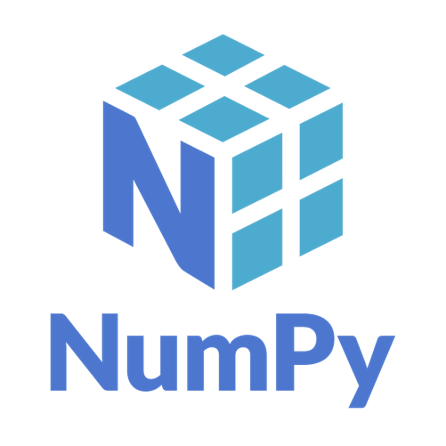

# NUMPY

1. [Introducción a NumPy](#numpy)
    + 1.1[Tupla como array](#tupla)
    + 1.2[Diccionario como array](#dict)
    + 1.3[Lista como array](#lista)
    + 1.4[Dimensiones de un array](#ndim)
2. [Seleccionando elementos de un array](#index)
3. [Estructura de un array](#structure)
4. [Creando slices de arrays](#slice)
5. [Manipulando dimensiones de un array](#reshape)
6. [Stacking de arrays](#stack)
7. [Split de arrays](#split)
8. [Atributos de un array](#atributos)
9. [Convirtiendo arrays](#convert)
10. [Copias y vistas de arrays](#copy)
11. [Operaciones sobre arrays](#functions)
12. [Ejercicios](#exercises)


# Introducción a NumPy <a name="numpy"></a> 

Importamos la librería numpy (si no funciona realizar __pip install numpy__ desde una consola de comandos)

In [1]:
import numpy

In [2]:
# Creamos nuestro primer array

arr = numpy.array([10, 20, 98, 34])

arr

array([10, 20, 98, 34])

In [3]:
# Observamos el tipo de clase que tiene un array
print(type(arr))

<class 'numpy.ndarray'>


Algo muy extendido entre la comunidad de desarrolladores de Python es utilizar __alias__ en las librerías, para acortar su nombre e identificarlas más fácilmente, en el caso de __numpy__ utilizaremos el alias __np__

In [4]:
import numpy as np

# Creamos de nuevo un array
arr = np.array([23, 42, 58])

arr

array([23, 42, 58])

## Tupla como array <a name="tupla"></a> 

In [5]:
mi_tupla = (1, 58, 63, 45)
print(type(mi_tupla))

<class 'tuple'>


In [6]:
arr_tuple = np.array(mi_tupla)

print(arr_tuple)
print(type(arr_tuple))

[ 1 58 63 45]
<class 'numpy.ndarray'>


## Diccionario como array <a name="dict"></a> 

In [7]:
my_dict = {'one': 'uno', 
           'two': 'dos',
           'three': 'tres'}

In [8]:
arr_dict = np.array(my_dict)

In [9]:
arr_dict # No parece que se haya generado un array con índices...

array({'one': 'uno', 'two': 'dos', 'three': 'tres'}, dtype=object)

In [10]:
arr_dict[0] # Tratamos de indexar por cero

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [11]:
arr_dict.keys() # Pero tampoco tiene el atributo keys de un diccionario
                # ¿Qué array tenemos realmente?

AttributeError: 'numpy.ndarray' object has no attribute 'keys'

Mejor pasarlo antes a lista...

In [12]:
dict_list = list(my_dict.items())
print(dict_list)

[('one', 'uno'), ('two', 'dos'), ('three', 'tres')]


In [14]:
arr_dict = np.array(dict_list)
print(arr_dict)

[['one' 'uno']
 ['two' 'dos']
 ['three' 'tres']]


In [15]:
arr_dict[0]

array(['one', 'uno'], dtype='<U5')

## Lista como un array <a name="lista"></a> 

In [17]:
my_list = [50, 20, 90, 66, 55, 44, 77]

list_arr = np.array(my_list)
list_arr

array([50, 20, 90, 66, 55, 44, 77])

## Dimensiones de un array <a name="ndim"></a> 

Verficamos las dimensiones de un array con la función <code>__ndim__</code>

In [18]:
# Ejemplo 1: Array 1D
arr_1d = np.array([1, 2, 3])

print("Número de dimensiones:", arr_1d.ndim)

Número de dimensiones: 1


In [19]:
# Ejemplo 2: Array 2D - Matriz
arr_2d = np.array([
    [1, 2, 3], 
    [4, 5, 6]])

print("Número de dimensiones:", arr_2d.ndim)

Número de dimensiones: 2


In [20]:
# Ejemplo 3: Array 3D - Tensor
arr_3d = np.array([
    [[1, 2, 3], [4, 5, 6]], 
    [[7, 8, 9], [10, 11, 12]]
                  ])

print("Número de dimensiones:", arr_3d.ndim)

Número de dimensiones: 3


# Seleccionando elementos de un array <a name="index"></a> 

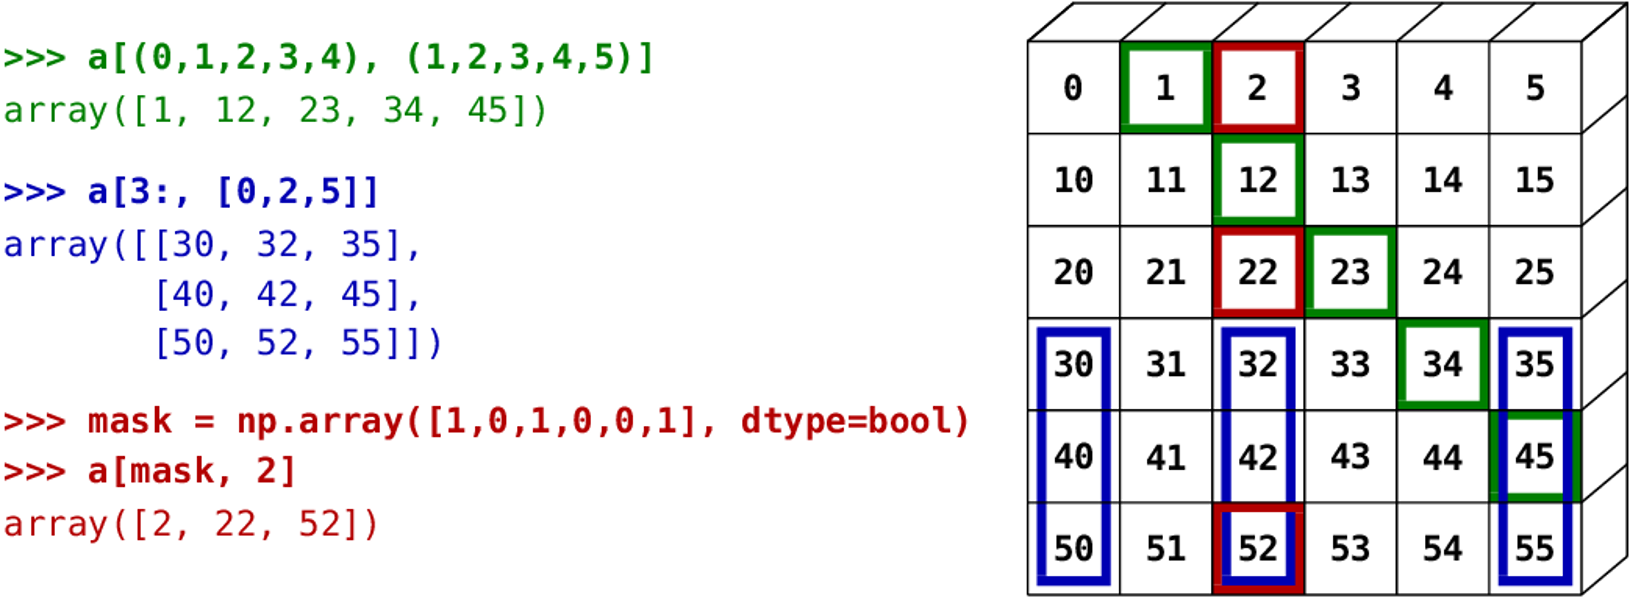

Es importante tener en cuenta algo, ahora podemos tener lo siguiente:
- Vector (indexable de 0 a n)
- Matriz (indexables las filas de 0 a n) (indexables las columnas de 0 a m)
- Tensor (matriz de matrices). En donde podemos indexar cada matriz y, sobre cada matriz sus filas y columnas

Cada operación de indexación que realizamos puede tener todos los componentes que conocemos sobre índices:
- Start
- End
- Step

Más consideraciones:
+ Cuando utilizamos el operador dos puntos `:` puede tener dos sentidos, desde el inicio o, hasta el final
+ Por ejemplo si tenemos un vector y hacemos `arr[:6]` Sería desde inicio hasta la posición 6 (n-1) o equivalente a `arr[0:6]`
+ Si realizamos `arr[10:]` sería desde la 10 hasta el final del array, equivalente a `arr[10:len(arr)]`

In [24]:
arr_1d

array([1, 2, 3])

In [21]:
print("Primer elemento:", arr_1d[0])  # Acceder al primer elemento
print("Último elemento:", arr_1d[-1])  # Acceder al último elemento

Primer elemento: 1
Último elemento: 3


In [25]:
arr_2d

array([[1, 2, 3],
       [4, 5, 6]])

In [22]:
print("Elemento en la segunda fila y tercer columna:", arr_2d[1, 2])
print("Primera fila completa:", arr_2d[0, :])  # Todos los elementos de la primera fila
print("Segunda columna completa:", arr_2d[:, 1])  # Todos los elementos de la segunda columna

Elemento en la segunda fila y tercer columna: 6
Primera fila completa: [1 2 3]
Segunda columna completa: [2 5]


In [26]:
arr_3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [23]:
print("Elemento en la segunda matriz, primera fila y segundo elemento:", arr_3d[1, 0, 1])

Elemento en la segunda matriz, primera fila y segundo elemento: 8


# Estructura de un array <a name="structure"></a> 

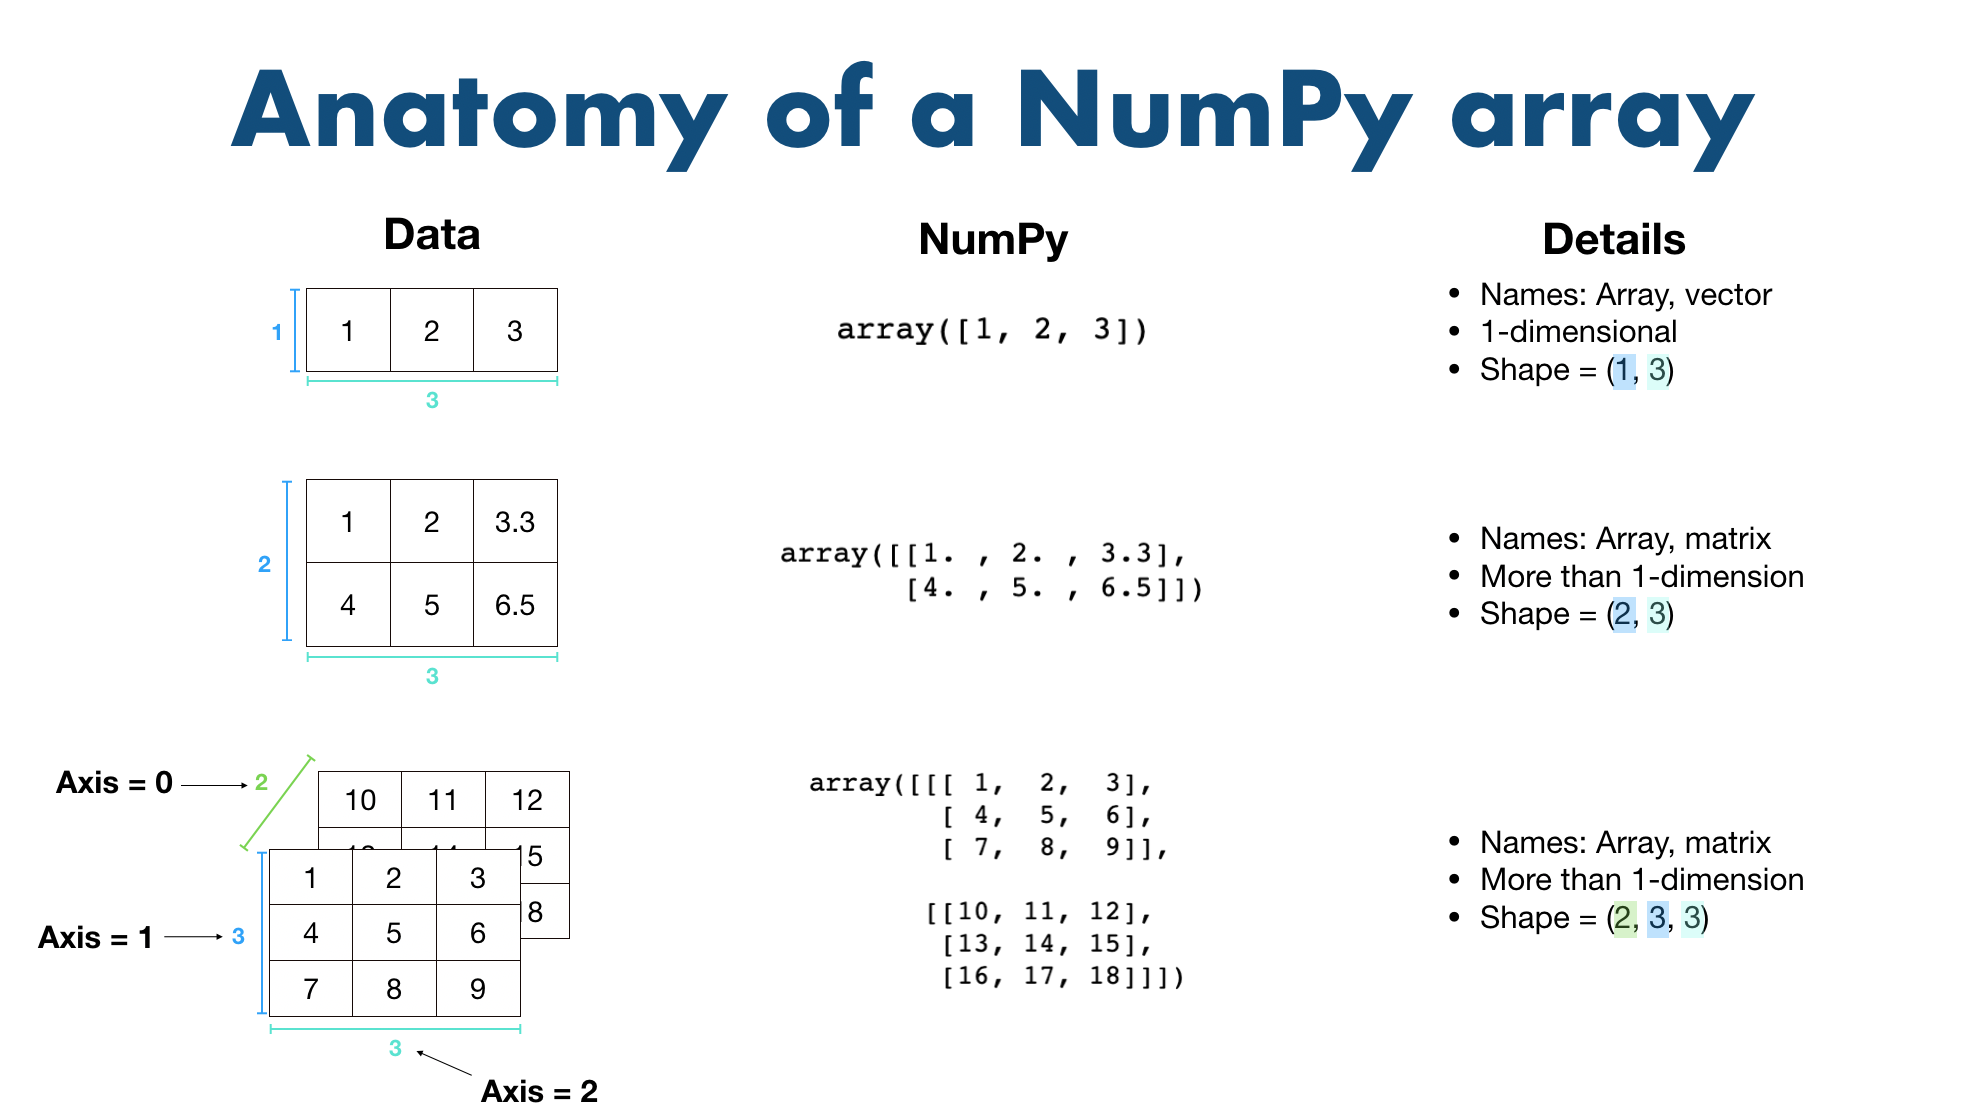

Para ello utilizamos la función <code>__shape__</code> que nos devuelve la siguiente información
* (__longitud elementos dim 1__, __longitud elementos dim 2__,..., __longitud elementos dim n__)

In [27]:
print(arr_1d.shape)

(3,)


In [28]:
print(arr_2d.shape)

(2, 3)


In [29]:
print(arr_3d.shape)

(2, 2, 3)


### Pregunta.

¿Cuál será la estructura `shape` de este array?

In [30]:
pregunta = np.array([
    [
        [1, 10, 100, 1000],
        [2, 20, 200, 2000],
        [3, 30, 300, 3000]
    ],
    [
        [4, 40, 400, 4000],
        [5, 50, 500, 5000],
        [6, 60, 600, 6000]
    ], 
    [
        [7, 70, 700, 7000],
        [8, 80, 800, 8000],
        [9, 90, 900, 9000]
    ]
])

# Creando slices de arrays <a name="slice"></a> 

In [31]:
my_array = np.arange(11) # Arrange toma de 0 a n-1 o, un array de 11 elementos donde el 0 es el primer elemento.

In [32]:
my_array

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

De posición 0 a 3

In [33]:
my_array[0:3] # De posición 0 a 3

array([0, 1, 2])

De posición 2 a 7

In [34]:
my_array[2:7] # De posición 2 a 7

array([2, 3, 4, 5, 6])

De inicio a 6

In [35]:
my_array[:6] # De inicio a 6

array([0, 1, 2, 3, 4, 5])

De 6 a final

In [36]:
my_array[6:] # De 6 a final

array([ 6,  7,  8,  9, 10])

De inicio a 9 de tres en tres elementos

In [37]:
my_array[:9:3] # De inicio a 9 de tres en tres elementos

array([0, 3, 6])

De 6 a fin de dos en dos elementos

In [38]:
my_array[6::2] # De 6 a fin de dos en dos elementos

array([ 6,  8, 10])

Posición 2 empezando por el final

In [39]:
my_array

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [40]:
my_array[-2] # Posición 2 empezando por el final

9

De inicio hasta el elemento -3 del array

In [41]:
my_array[:-3] # De inicio hasta el elemento -3 del array

array([0, 1, 2, 3, 4, 5, 6, 7])

Array reverso

In [42]:
my_array[::-1] # Array reverso

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0])

De fin (reverso) a inicio tomados de 2 en 2

In [43]:
my_array[::-2] # De fin (reverso) a inicio tomados de 2 en 2

array([10,  8,  6,  4,  2,  0])

También acepta operadores lógicos aunque en numpy:
* and = &
* or = |

In [44]:
my_array[(my_array >= 2 )] # Todos los elementos mayores o igual que 2

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

In [45]:
my_array[(my_array >= 2 ) & (my_array <=9)] # Todos los elementos entre 2 y 9

array([2, 3, 4, 5, 6, 7, 8, 9])

In [46]:
my_array[(my_array == 2 ) | (my_array ==9)] # Todos los elementos iguales a 2 o 9

array([2, 9])

# Manipulando dimensiones de un array <a name="reshape"></a> 

Podemos definir las dimensiones de un array con la función <code>__reshape__</code>, por ejemplo, crear un array de 2 listas, con 3 sublistas de 6 elementos cada una.

In [47]:
new_array = np.arange(36).reshape(2,3,6)

In [48]:
new_array

array([[[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17]],

       [[18, 19, 20, 21, 22, 23],
        [24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35]]])

Podemos recodificar otros arrays a una nueva dimensión

In [53]:
new_dims = arr_3d.reshape(2,6) # Eliminamos una dimensión
new_dims

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12]])

Lo contrario de reshape, es la función <code>__flatten__</code>, es decir, eliminar todas las dimensiones y dejar un array plano

In [54]:
new_dims.flatten()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

### Pregunta 

Es posible reestructurar el siguiente array

In [55]:
preg_uno = np.array([
    [10, 30, 45],
    [12, 40, 20, 10]
])

C:\Users\jmmor\AppData\Local\Temp\ipykernel_3640\2106829471.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  preg_uno = np.array([


¿En la siguiente estructura? `preg_uno.reshape(4, 2)`

### Pregunta 

Es posible reestructurar el siguiente array

In [56]:
preg_dos = np.array([
    [10, 30, 45, 150],
    [12, 40, 20, 10]
])

¿En la siguiente estructura? `preg_dos.reshape(4, 2)`

# _Stacking_ (apliando) de arrays <a name="stack"></a> 

Los arrays pueden ser apilados ( _stacking_ ) de forma horizontal, vertical o en profundad. Veamos algunos casos y las funciones necesarias para ello.

In [57]:
pares = np.array([
    [0, 2, 4],
    [6, 8, 10],
    [12, 14, 16]
])

impares = np.array([
    [1, 3, 5],
    [7, 9, 11],
    [13, 15, 17]
])

* **Stacking Horizontal** <code>__hstack__</code>

In [58]:
np.hstack((pares, impares)) # Apila los arrays en referencia a las columnas

array([[ 0,  2,  4,  1,  3,  5],
       [ 6,  8, 10,  7,  9, 11],
       [12, 14, 16, 13, 15, 17]])

* **Stacking Vertical** <code>__vstack__</code>

In [59]:
np.vstack((pares, impares)) # Apila los arrays en referencia al número de filas.

array([[ 0,  2,  4],
       [ 6,  8, 10],
       [12, 14, 16],
       [ 1,  3,  5],
       [ 7,  9, 11],
       [13, 15, 17]])

* Ambas funciones son equivalentes a <code>__concatenate__</code>, en este caso el elemento que diferencia el método de unión es el parámetro axis. 0 por filas, 1 columnas

In [60]:
np.concatenate((pares, impares), axis=1)

array([[ 0,  2,  4,  1,  3,  5],
       [ 6,  8, 10,  7,  9, 11],
       [12, 14, 16, 13, 15, 17]])

In [61]:
np.concatenate((pares, impares), axis=0)

array([[ 0,  2,  4],
       [ 6,  8, 10],
       [12, 14, 16],
       [ 1,  3,  5],
       [ 7,  9, 11],
       [13, 15, 17]])

# Splitting (dividiendo) arrays <a name="split"></a> 

Al igual que podemos apilar o unir arrays, también podemos dividir arrays en nuevos arrays, los criterios de unión son muy similares a los de división: Horizaontal, vertical y en profundidad 

* Para división horizontal <code>**hsplit**</code>, importante, esta función toma un valor de división que debe ser igual al número de elementos del array (por lista) o, divisible por la longitud del número de elementos.

In [62]:
np.hsplit(pares, 3)

[array([[ 0],
        [ 6],
        [12]]),
 array([[ 2],
        [ 8],
        [14]]),
 array([[ 4],
        [10],
        [16]])]

* Para división vertical <code>**vsplit**</code>, importante, esta función toma un valor de división que debe ser igual al número de elementos del array (por lista) o, divisible por la longitud del número de elementos

In [63]:
np.vsplit(pares, 3)

[array([[0, 2, 4]]), array([[ 6,  8, 10]]), array([[12, 14, 16]])]

* Equivalentemente tenemos la función <code>**split**</code> que nos permite realizar la división del array por columnas o filas

In [64]:
np.split(pares, 3, axis=1)

[array([[ 0],
        [ 6],
        [12]]),
 array([[ 2],
        [ 8],
        [14]]),
 array([[ 4],
        [10],
        [16]])]

In [65]:
np.split(pares, 3, axis=0)

[array([[0, 2, 4]]), array([[ 6,  8, 10]]), array([[12, 14, 16]])]

# Atributos de un array <a name="atributos"></a> 

* <code>**ndim**</code> Muestra el número de dimensiones de un array

In [68]:
arr_3d.ndim

3

* <code>**size**</code> Cuenta el número de elementos.

In [69]:
arr_3d.size

12

* <code>**itemsize**</code> Espacio que ocupa en bytes cada elemento del array

In [70]:
arr_3d.itemsize

4

* <code>**nbytes**</code> Tamaño de todo el array en bytes

In [71]:
arr_3d.nbytes

48

* <code>**T**</code> Transpuesta del array

In [72]:
arr_3d.T

array([[[ 1,  7],
        [ 4, 10]],

       [[ 2,  8],
        [ 5, 11]],

       [[ 3,  9],
        [ 6, 12]]])

# Convirtiendo arrays <a name="convert"></a> 

Es posible extraer slices del array o, simplemente todo el array para obtener listas o modificar el tipo del array, en este caso utilizaremos dos funciones para realizar conversiones sobre el array.

* <code>**tolist**</code> Convierte a lista el array o un slice del mismo

In [73]:
lista = arr_3d.tolist()

In [74]:
print(lista)
print(type(lista))

[[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]]
<class 'list'>


* <code>**astype**</code> Para modificar el tipo del array.

In [75]:
arr_3d.astype(float)

array([[[ 1.,  2.,  3.],
        [ 4.,  5.,  6.]],

       [[ 7.,  8.,  9.],
        [10., 11., 12.]]])

In [76]:
arr_3d.astype(str)

array([[['1', '2', '3'],
        ['4', '5', '6']],

       [['7', '8', '9'],
        ['10', '11', '12']]], dtype='<U11')

In [77]:
arr_3d.astype(int)

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

# Copias y Vistas de un array. <a name="copy"></a> 

Es importante mencionar que al igual que las listas los arrays comparten posiciones en nuestra memoria física, por lo tanto, si no utilizamos los comandos necesario para realizar una copia de un array correctamente, los cambios que hagamos en el array_a, se verán reflejados en el array_b.

Vamos a ver el ejemplo más básico, hacer una copia de un array asignándolo a una nueva variable.

In [78]:
# Definimos un array con elementos del 2 hasta 20
arr = np.arange(2, 20)

In [79]:
# Asignamos las dos últimas posiciones a la variable b
b = arr[-2:]
b

array([18, 19])

In [80]:
# Asignamos todas las posiciones del array b a cero.
b[::] = 0
b

array([0, 0])

In [81]:
# Los cambios se reflejan en nuestra variable arr
arr

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,  0,
        0])

Para evitar que esto ocurra, si realmente queremos obtener una copia de un array para su posterior procesamiento o modificación, lo mejor es copiar el array con el comando <code>__copy()__</code>

In [84]:
array_copiado = arr.copy()

Realizamos una modificación en el array original

In [87]:
arr[1] = 2200

arr

array([   2, 2200,    4,    5,    6,    7,    8,    9,   10,   11,   12,
         13,   14,   15,   16,   17,    0,    0])

Vemos si los cambios aparecen en nuestra copia

In [88]:
array_copiado

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,  0,
        0])

# Operaciones sobre arrays <a name="functions"></a> 

Existen varias operaciones que podemos realizar sobre arrays, es importante enfatizar en la importancia de saber sobre qué eje ( *axis* ) de los arrays queremos realizar la suma

* Suma <code>**sum**</code>

In [89]:
arr = np.array([[1, 2, 3], [4, 5, 6]])

# Calcular la suma de todos los elementos en el array
suma_total = np.sum(arr)

# Calcular la suma a lo largo de cada columna (eje 0)
suma_por_columna = np.sum(arr, axis=0)

# Calcular la suma a lo largo de cada fila (eje 1)
suma_por_fila = np.sum(arr, axis=1)

print("Array original:")
print(arr)
print("\nSuma total:", suma_total)
print("Suma por columna:", suma_por_columna)
print("Suma por fila:", suma_por_fila)


Array original:
[[1 2 3]
 [4 5 6]]

Suma total: 21
Suma por columna: [5 7 9]
Suma por fila: [ 6 15]


* <code>**ones**</code> genera un array solamente con unos.

In [90]:
ones = np.ones(5)
ones

array([1., 1., 1., 1., 1.])

* <code>**zeros**</code> genera un array solamente con ceros.

In [94]:
zeros = np.zeros(5)
zeros

array([0., 0., 0., 0., 0.])

* <code>**linspace**</code> se utiliza para crear un array de números espaciados de manera uniforme en un intervalo dado

In [95]:
# Crear un array de 5 elementos entre 0 y 1 (ambos incluidos)
arr = np.linspace(0, 1, num=5)
arr

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

Desde el punto de vista estadístico y, para el machine learning en lo que respecta a generar valores que serán parámetros en modelos, es importante tener en cuenta cómo poder generar números aleatorios

* <code>**random**</code> Como función. Importa una serie de funciones para generación de números aleatorios de diferente distribución. Algunos de los diferentes valores que podemos generar son:

* <code>**rand**</code>: Valores aleatorios, dada una estructura.
* <code>**randn**</code> : Valores aleatorios siguiendo una distribución normal.
* <code>**randint**</code>: Valores aleatorios enteros desde menor valor a mayor.
* <code>**random**</code>: Valores aleatorios de tipo float entre el intervalo [0.0, 1.0].
* <code>**beta**</code>: Valores que siguen una distribución Beta.
* <code>**binomial**</code>: Valores aleatorios que siguen una distribución Binomial.
* <code>**gamma**</code>: Valores que siguen una distribución Gamma.

Todos los diferentes valores aleatorios y distribuciones que podemos realizar se encuentran en el siguiente link. https://numpy.org/doc/1.16/reference/routines.random.html

In [96]:
rand = np.random.rand(10)
rand

array([0.28857926, 0.01246061, 0.77865722, 0.70124902, 0.43109998,
       0.77448742, 0.28792007, 0.36644195, 0.30785703, 0.66322902])

In [97]:
randn = np.random.randn(10)
randn

array([-0.71845524,  0.45684416,  1.35733227,  0.00316313, -0.71431271,
        0.72681607, -0.80439363,  0.45009308, -0.69000584, -0.06634836])

In [98]:
randint = np.random.randint(20, 100, 10)
randint

array([88, 97, 70, 93, 85, 24, 84, 30, 36, 55])

In [99]:
random = np.random.random(10)
random

array([0.70516727, 0.34998494, 0.64144745, 0.71944757, 0.00890402,
       0.51068043, 0.96279592, 0.49901274, 0.78986948, 0.72535977])

In [100]:
beta = np.random.beta(0.2, 0.5, 10)
beta

array([3.19382413e-02, 9.36511986e-01, 6.40130133e-04, 8.32648302e-02,
       6.95855620e-02, 9.44363086e-01, 3.98504924e-01, 4.64656172e-01,
       5.02046784e-02, 5.75927361e-02])

In [101]:
binomial = np.random.binomial(10, 0.5, 10)
binomial

array([8, 5, 7, 5, 4, 5, 5, 8, 5, 4])

In [102]:
gamma = np.random.gamma(0.25, 0.3, 10)
gamma

array([3.96980404e-02, 1.37590228e-03, 6.78065623e-03, 3.20146527e-02,
       1.41806861e-02, 1.03421939e+00, 6.33213103e-02, 2.44892315e-04,
       3.77865061e-02, 1.19024206e+00])

* <code>**round**</code>: Permite redondear a n decimales todo un array.

In [103]:
gamma.round(2)

array([0.04, 0.  , 0.01, 0.03, 0.01, 1.03, 0.06, 0.  , 0.04, 1.19])

* <code>**fill**</code>: Permite rellenar un array con un valor pasado por parámetro.

In [104]:
zero_array = np.zeros(20)
zero_array[5:15].fill(5)
zero_array

array([0., 0., 0., 0., 0., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 0., 0.,
       0., 0., 0.])

* <code>**mean**</code>: Realiza la media del array o por uno de sus ejes.

In [106]:
arr = np.array([[1, 2, 3], [4, 5, 6]])

# Calcular la media de todos los elementos en el array
media_total = np.mean(arr)

# Calcular la media a lo largo de cada columna (eje 0)
media_por_columna = np.mean(arr, axis=0)

# Calcular la media a lo largo de cada fila (eje 1)
media_por_fila = np.mean(arr, axis=1)

print("Array original:")
print(arr)
print("\nMedia total:", media_total)
print("Media por columna:", media_por_columna)
print("Media por fila:", media_por_fila)

Array original:
[[1 2 3]
 [4 5 6]]

Media total: 3.5
Media por columna: [2.5 3.5 4.5]
Media por fila: [2. 5.]


* <code>**dot**</code> y <code>**matmul**</code>: Producto de matrices



In [107]:
# Crear dos matrices
matriz_a = np.array([[1, 2], [3, 4]])
matriz_b = np.array([[5, 6], [7, 8]])

# Realizar la multiplicación de matrices usando dot
resultado_dot = np.dot(matriz_a, matriz_b)

print("Matriz A:")
print(matriz_a)
print("\nMatriz B:")
print(matriz_b)
print("\nResultado usando np.dot():")
print(resultado_dot)

Matriz A:
[[1 2]
 [3 4]]

Matriz B:
[[5 6]
 [7 8]]

Resultado usando np.dot():
[[19 22]
 [43 50]]


In [108]:
# Realizar la multiplicación de matrices usando matmul
resultado_matmul = np.matmul(matriz_a, matriz_b)

print("Matriz A:")
print(matriz_a)
print("\nMatriz B:")
print(matriz_b)
print("\nResultado usando np.matmul():")
print(resultado_matmul)

Matriz A:
[[1 2]
 [3 4]]

Matriz B:
[[5 6]
 [7 8]]

Resultado usando np.matmul():
[[19 22]
 [43 50]]


Ambos ejemplos realizan la multiplicación de las matrices A y B, pero usando las dos funciones diferentes. Ambas producirán el mismo resultado en este caso particular.

Las dos funciones son flexibles y pueden manejar diferentes dimensiones de arrays, pero es importante tener en cuenta que np.dot() también se utiliza para realizar el producto escalar de dos arrays 1D y el producto matricial de dos arrays 2D, mientras que np.matmul() es específicamente para el producto matricial.

* <code>**min**</code>: Valor mínimo del array o de uno de sus ejes

In [109]:
aux = np.array([
    [1, 100, 5],
    [2, 4, 0]
])

aux.min()

0

In [110]:
aux.min(axis=0)

array([1, 4, 0])

In [111]:
aux.min(axis=1)

array([1, 0])

* <code>**max**</code>: Valor máximo del array o de uno de sus ejes

In [112]:
print(aux.max())
print(aux.max(axis=0))
print(aux.max(axis=1))

100
[  2 100   5]
[100   4]


* <code>**argmin**</code>: Posición del índice con el valor mínimo de un array

In [113]:
aux.argmin()

5

* <code>**argmax**</code>: Posición del índice con el valor máximo de un array

In [114]:
aux.argmax()

1

* <code>**sort**</code>: Ordenar elementos de un array.

In [115]:
aux.sort()
aux

array([[  1,   5, 100],
       [  0,   2,   4]])

* **`diag`**: Muestra la diagonal del array

In [116]:
np.diag(aux)

array([1, 2])

También permite crear la diagonal

In [117]:
np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

* **`eye`**: Permite crear la matriz de identidad

In [118]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

# Ejercicios <a name="exercises"></a> 

### Ejercicio 1. 

Toma la siguiente lista:

```python
lista = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
```

Multiplica cada elemento de la lista por dos. Posteriormente, guarda la lista como array y, realiza la misma operación ¿Qué diferencias encuentras?

#### Solución

In [ ]:
# En clase

### Ejercicio 2

Vamos a medir el rendimiento de las listas vs arrays. 
+ Genera con `range` un rango de 0 a 10.000.000 y multiplica cada elemento por 2 (guardalo en una lista)
+ Genera con `np.arange`un array (planp) de 0 a 10.000.000 multiplica cada elemento por 2 (guardalo en un nuevo array)

¿Qué diferencias observas en los tiempos de ejecución?

NOTA: Para medir el tiempo que tarda en ejecutarse una celda de código puedes emplear la siguiente notación con los operadores magic al inicio de la celda.
```python
%%time
```

#### Solución

In [119]:
# En clase

### Ejercicio 3

Crea un array que sea desde el elemento 20, hasta el elemento 60, muestra el array de principio al final, tomado de 5 en 5 elementos.

#### Solución

In [120]:
# En clase

### Ejercicio 4

Crea una matriz regular que contenga los elementos del 1 al 9

#### Solución 

In [121]:
# En clase

### Ejercicio 5

Toma el siguiente array como entrada

```python
ej_5 = np.array([
    [10, 30, 45, 150],
    [12, 40, 20, 10]
])
```

Genera un array plano y, muestra todos sus elementos menos el primero y el último (10, 10)

#### Solución

In [122]:
# En clase

### Ejercicio 6

Escribe una matriz de 3x4 con los números del 100 al 112, muestra solamente aquellos valores mayores a 106. ¿De qué forma se devuelven los resultados?


#### Solución

In [123]:
# En clase

### Ejercicio 7

Normaliza todos los elementos del siguiente array, siguiendo la normalización Z score https://es.wikipedia.org/wiki/Unidad_tipificada

#### Solución

In [ ]:
# En clase

### Ejercicio 8

* Crea dos matrices aleatorias de tamaño 3x3, A y B.
* Calcula la transpuesta de la matriz A.
* Calcula la inversa de la matriz B.
* Multiplica la matriz A original por su transpuesta.
* Calcula la suma de todos los elementos en la matriz resultante del paso 4.
* Encuentra los valores propios (eigenvalues) y los vectores propios (eigenvectors) de la matriz B.

Puedes tomar para generar las matrices el siguiente código:

```python
A = np.random.rand(3, 3)
B = np.random.rand(3, 3)
```

#### Solución

In [124]:
# Paso 1: Crear dos matrices aleatorias de tamaño 3x3
A = np.random.rand(3, 3)
B = np.random.rand(3, 3)

In [125]:
A

array([[0.16565357, 0.9950229 , 0.62816042],
       [0.67461585, 0.25688686, 0.09779039],
       [0.35362993, 0.57579772, 0.55981462]])

In [126]:
B

array([[0.01184463, 0.89343087, 0.16999545],
       [0.23789232, 0.59088072, 0.13307021],
       [0.08616527, 0.16602503, 0.84078751]])

In [127]:
# Paso 2: Calcular la transpuesta de la matriz A
A_transpuesta = np.transpose(A)
print("Transpuesta de la matriz A:")
print(A_transpuesta)

Transpuesta de la matriz A:
[[0.16565357 0.67461585 0.35362993]
 [0.9950229  0.25688686 0.57579772]
 [0.62816042 0.09779039 0.55981462]]


In [128]:
# Paso 3: Calcular la inversa de la matriz B
B_inversa = np.linalg.inv(B)
print("Inversa de la matriz B:")
print(B_inversa)

Inversa de la matriz B:
[[-2.88096731  4.38756406 -0.11192214]
 [ 1.14429108  0.02845624 -0.23586334]
 [ 0.06929022 -0.45526375  1.24740557]]


In [129]:
# Paso 4: Multiplicar la matriz A original por su transpuesta
A_por_A_transpuesta = np.dot(A, A_transpuesta)
print("Multiplicación de A por su transpuesta:")
print(A_por_A_transpuesta)

Multiplicación de A por su transpuesta:
[[1.41209719 0.42878888 0.98316536]
 [0.42878888 0.53066036 0.44122371]
 [0.98316536 0.44122371 0.76998955]]


In [130]:
# Paso 5: Calcular la suma de todos los elementos en la matriz resultante del paso 4
suma_elementos = np.sum(A_por_A_transpuesta)
print("Suma de todos los elementos en la matriz resultante:")
print(suma_elementos)

Suma de todos los elementos en la matriz resultante:
6.419103017285493


In [131]:
# Paso 6: Encontrar los valores propios y vectores propios de la matriz B
valores_propios, vectores_propios = np.linalg.eig(B)
print("Valores propios de la matriz B:")
print(valores_propios)

print("Vectores propios de la matriz B:")
print(vectores_propios)

Valores propios de la matriz B:
[-0.24380295  0.65417332  1.03314249]
Vectores propios de la matriz B:
[[ 0.96257319 -0.51980917  0.54684407]
 [-0.26870806 -0.50484193  0.49689506]
 [-0.03533879  0.68915387  0.67383741]]


## Ejercicio 9

Crea una matriz 5x5 con valores aleatorios ye ncuentra el valor más cercano a un número dado en la matriz.

#### Solución

In [132]:
# Paso 1: Crear una matriz 5x5 con valores aleatorios
matriz = np.random.rand(5, 5)

In [133]:
# Paso 2: Encontrar el valor más cercano a un número dado
numero_dado = 0.5 # Input para cualquier otro
valor_mas_cercano = matriz.flat[np.abs(matriz - numero_dado).argmin()]

In [136]:
matriz.round(3)

array([[0.041, 0.314, 0.737, 0.343, 0.286],
       [0.396, 0.945, 0.683, 0.364, 0.021],
       [0.001, 0.16 , 0.012, 0.366, 0.679],
       [0.941, 0.129, 0.429, 0.439, 0.9  ],
       [0.262, 0.531, 0.068, 0.684, 0.113]])

In [139]:
print("Valor más cercano:", round(valor_mas_cercano,3))

Valor más cercano: 0.531


### Ejercicio 10

Genera una matriz cualquiera con números aleatorios entre el 1 y el 100. Encuentra los elementos únicos y cuenta cuántas veces aparece cada valor único en la matriz.

#### Solución

In [143]:
# Paso 1: Crear una matriz 5x5 con valores aleatorios entre 1 y 100
matriz = np.random.randint(1, 101, size = (10, 5), )
matriz

# Paso 2: Encontrar elementos únicos y contar su frecuencia
elementos_unicos, frecuencia = np.unique(matriz, return_counts=True)

# Imprimir los resultados
print("Matriz:")
print(matriz)
print("\nElementos únicos:", elementos_unicos)
print("Frecuencia de cada elemento único:", frecuencia)


Matriz:
[[74 22  5 38 49]
 [28 69 18  2 33]
 [ 4 89 11 30 75]
 [66  1 59 36 15]
 [45 40 16 33 99]]

Elementos únicos: [ 1  2  4  5 11 15 16 18 22 28 30 33 36 38 40 45 49 59 66 69 74 75 89 99]
Frecuencia de cada elemento único: [1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1]
